## TESTE MANN WHITNEY (soma de postos de Wilcoxon) 

Teste Não paramétrico

Duas amostras independentes 


In [1]:
import numpy as np
import pandas as pd

In [2]:
enem_sp = pd.read_csv('/content/drive/MyDrive/Cursos_Udemy/curso_estatistica_python/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

In [3]:
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,NaN,1,1,1,1,564.6,585.8,592.9,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,Belém,1,1,1,1,576.2,641.1,634.3,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,424.8,509.6,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,NaN,1,1,1,1,399.6,426.8,487.2,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,NaN,1,1,1,1,625.7,646.5,629.3,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


Objetivo:
Analisar a diferença entre as MEDIANAS de mulheres e homens para as notas do colégio x.






In [4]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [5]:
colegiox.shape

(41, 28)

In [6]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,46.3,447.2,557.3,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,505.9,534.5,529.8,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,449.4,436.4,45.8,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,468.6,606.1,576.6,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,414.3,553.7,49.5,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim


In [7]:
colegiox_mulher = colegiox.loc[colegiox.SEXO == 'F']

In [8]:
colegiox_mulher.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,505.9,534.5,529.8,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,449.4,436.4,45.8,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,414.3,553.7,49.5,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim
84,"1,90E+11",Águas de Lindóia,19,F,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,397.8,458.5,473.5,420.6,Espanhol,1.0,140.0,40.0,40.0,120.0,20.0,360.0,Sim
91,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,436.3,528.8,530.7,537.9,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim


In [9]:
colegiox_mulher.shape

(28, 28)

In [11]:
colegiox_homem = colegiox.loc[colegiox.SEXO == 'M']

In [12]:
colegiox_homem.shape

(13, 28)

In [13]:
colegiox_homem.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,46.3,447.2,557.3,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,468.6,606.1,576.6,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
85,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,469.1,528.7,488.4,508.2,Espanhol,1.0,140.0,140.0,120.0,160.0,120.0,680.0,Sim
108151,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,50.7,558.1,569.4,705.3,Inglês,1.0,140.0,160.0,120.0,140.0,100.0,660.0,Sim
182519,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,460.2,358.7,475.6,480.9,Espanhol,1.0,100.0,120.0,100.0,100.0,100.0,520.0,Sim


1) Analisar a classificação das variáveis

In [14]:
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [15]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar Normalidade

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [16]:
import scipy.stats as stats

In [17]:
import matplotlib.pyplot as plt

In [18]:
# Teste Shapiro-Wilk - MATEMÁTICA
stats.shapiro(colegiox_mulher.NOTA_MT)

(0.7194502353668213, 5.43060059499112e-06)

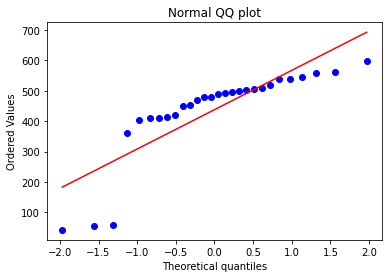

In [19]:
stats.probplot(colegiox_mulher['NOTA_MT'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [20]:
stats.shapiro(colegiox_homem.NOTA_MT)

(0.8659597635269165, 0.04620101675391197)

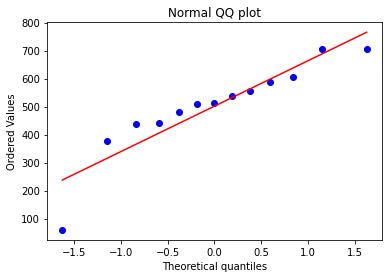

In [21]:
stats.probplot(colegiox_homem['NOTA_MT'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [22]:
# Teste Shapiro-Wilk - CIÊNCIAS DA NATUREZA
stats.shapiro(colegiox_mulher.NOTA_CN)

(0.7065989375114441, 3.5363013921596576e-06)

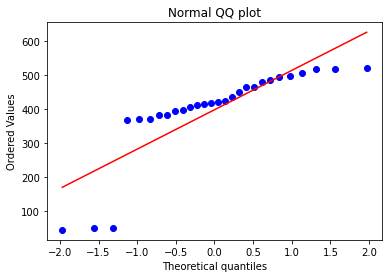

In [23]:
stats.probplot(colegiox_mulher['NOTA_CN'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [24]:
stats.shapiro(colegiox_homem.NOTA_CN)

(0.7647998332977295, 0.0026814276352524757)

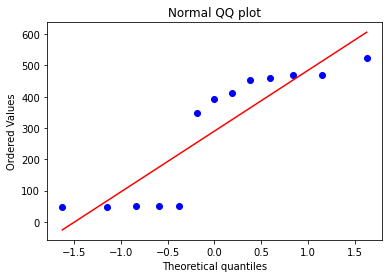

In [25]:
stats.probplot(colegiox_homem['NOTA_CN'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

**TESTE MANN WHITNEY**

Comparação das medianas das notas homens e mulheres do colégio X.

Ho = NÃO HÁ DIFERENÇA ENTRE AS MEDIANAS DAS NOTAS DE HOMENS E MULHERES : p > 0.05

Ha = HÁ DIFERENÇA ENTRE AS MEDIANAS DAS NOTAS ENTRE HOMENS E MULHERES : p <= 0.05

In [26]:
import scipy.stats as stats

In [27]:
stat, p = stats.mannwhitneyu(colegiox_mulher.NOTA_MT, colegiox_homem.NOTA_MT)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 127.0
p-valor: 0.06339241814609269


In [28]:
stat, p = stats.mannwhitneyu(colegiox_mulher.NOTA_CN, colegiox_homem.NOTA_CN)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 136.0
p-valor: 0.10119800798647943


In [29]:
colegiox_mulher.NOTA_MT.describe()

count     28.000000
mean     437.928571
std      146.875707
min       42.400000
25%      413.375000
50%      485.150000
75%      512.550000
max      599.500000
Name: NOTA_MT, dtype: float64

In [30]:
colegiox_homem.NOTA_MT.describe()

count     13.000000
mean     501.515385
std      164.496808
min       59.500000
25%      442.600000
50%      513.900000
75%      588.800000
max      705.700000
Name: NOTA_MT, dtype: float64

In [31]:
colegiox_mulher.NOTA_CN.describe()

count     28.000000
mean     397.785714
std      132.791189
min       43.400000
25%      381.875000
50%      420.300000
75%      480.275000
max      521.600000
Name: NOTA_CN, dtype: float64

In [32]:
colegiox_homem.NOTA_CN.describe()

count     13.000000
mean     290.130769
std      202.857069
min       46.300000
25%       49.800000
50%      391.500000
75%      460.200000
max      523.100000
Name: NOTA_CN, dtype: float64

In [33]:
import plotly.express as px

In [34]:
grafico = px.box(colegiox, x = 'SEXO', y="NOTA_MT")
grafico.show()

In [35]:
grafico = px.box(colegiox, x = 'SEXO', y="NOTA_CN")
grafico.show()

**Conclusão:** Estatisticamente, com intervalo de confiança de 95%, não se pode concluir que a mediana das notas de Matemática e Ciências da natureza do colegio X sejam diferentes entre homens e mulheres.

